In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

Using TensorFlow backend.


In [2]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

In [3]:
data = pd.read_csv('telecom_churn_data.csv', index_col=None)
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
data.shape

(99999, 226)

In [6]:
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  96062.000000  96140.000000  94621.000000  92254.000000  96062.000000   
mean     132.395875    133.670805    133.018098    130.302327    197.935577   
std      297.207406    308.794148    308.951589    308.477668    316.851613   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        7.380000      6.660000      6.460000      5.330000     34.730000   
50%       34.310000     32.330000     32.360000     29.840000     96.310000   
75%      118.740000    115.595000    115.860000    112.130000    231.860000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  96140.000000  94621.000000  92254.000000   96062.000000   96140.000000   
mean     197.045133    196.574803    190.337222       9.950013       7.149898   
std      325.862803    327.170662    319.396092      72.825411      73.447948   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%       32.190000     31.630000     27.130000       0.000000       0.000000   
50%       91.735000     92.140000     87.290000       0.000000       0.000000   
75%      226.815000    228.260000    220.505000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000   13724.380000   15371.040000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   94621.000000   92254.000000   96062.000000   96140.000000   
mean        7.292981       6.343841      13.911337       9.818732   
std        68.402466      57.137537      71.443196      58.455762   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max     13095.360000    8464.030000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   94621.000000   92254.000000      96062.000000      96140.000000   
mean        9.971890       8.555519         47.100763         46.473010   
std        64.713221      58.438186        150.856393        155.318705   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          1.660000          1.630000   
50%         0.000000       0.000000         11.910000         11.610000   
75%         0.000000       0.000000         40.960000         39.910000   
max      

# EDA
Data quality checks and imputations have been performed to clean and prepare the data for modelling.The checks are as follows:
1. Missing Data Imputation (Drop Columns with large of missing values and impute missing having lesser number of missing values using mean values)
2. Feature Engineering
3. Dropping Columns with with are correlated
4. Scaling data

In [7]:
# Data quality check for missing missing values
data.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [8]:
print(round((4760/99999)*100, 2))
print(round((73660/99999)*100, 2))

4.76
73.66


In [9]:
# Find and Drop columns with more than 70% of missing values

null70 = data.columns[data.isnull().sum()/len(data)>0.7].tolist()
len(null70)

40

In [10]:
df = data.drop(null70, axis=1)
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [11]:
# Separate columns of object and numeric type, so that feature engineering can be performed.

objcol = [i for i in df.columns if df[i].dtype == 'O']
print(len(objcol))
numcol = [i for i in df.columns if df[i].dtype != 'O']
print(len(numcol))

8
178


In [12]:
objcol

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

## Derive New Features
### Convert all datetime columns to from object to datetime datatype and create a new feature:
1. Early recharge (That how early the recharge was done for particular months) for each month

In [13]:
for i in objcol:
    df[i] = pd.to_datetime(df[i], dayfirst=True)

In [14]:
df['early_rech_6'] = df['last_date_of_month_6']-df['date_of_last_rech_6']
df['early_rech_6'] = df['early_rech_6'].apply(lambda x: x.days)
df['early_rech_7'] = df['last_date_of_month_7']-df['date_of_last_rech_7']
df['early_rech_7'] = df['early_rech_7'].apply(lambda x: x.days)
df['early_rech_8'] = df['last_date_of_month_8']-df['date_of_last_rech_8']
df['early_rech_8'] = df['early_rech_8'].apply(lambda x: x.days)
df['early_rech_9'] = df['last_date_of_month_9']-df['date_of_last_rech_9']
df['early_rech_9'] = df['early_rech_9'].apply(lambda x: x.days)

df = df.drop(objcol, axis=1)

### Count the unique values in each column and drop columns with no variance

In [15]:
dropcol1 = []

for i in numcol:
    print("{} -- {}".format(i, df[i].nunique()))
    if df[i].nunique()<=1:
        dropcol1.append(i)
        
print(len(dropcol1))

mobile_number -- 99999
circle_id -- 1
loc_og_t2o_mou -- 1
std_og_t2o_mou -- 1
loc_ic_t2o_mou -- 1
arpu_6 -- 85681
arpu_7 -- 85308
arpu_8 -- 83615
arpu_9 -- 79937
onnet_mou_6 -- 24313
onnet_mou_7 -- 24336
onnet_mou_8 -- 24089
onnet_mou_9 -- 23565
offnet_mou_6 -- 31140
offnet_mou_7 -- 31023
offnet_mou_8 -- 30908
offnet_mou_9 -- 30077
roam_ic_mou_6 -- 6512
roam_ic_mou_7 -- 5230
roam_ic_mou_8 -- 5315
roam_ic_mou_9 -- 4827
roam_og_mou_6 -- 8038
roam_og_mou_7 -- 6639
roam_og_mou_8 -- 6504
roam_og_mou_9 -- 5882
loc_og_t2t_mou_6 -- 13539
loc_og_t2t_mou_7 -- 13411
loc_og_t2t_mou_8 -- 13336
loc_og_t2t_mou_9 -- 12949
loc_og_t2m_mou_6 -- 20905
loc_og_t2m_mou_7 -- 20637
loc_og_t2m_mou_8 -- 20544
loc_og_t2m_mou_9 -- 20141
loc_og_t2f_mou_6 -- 3860
loc_og_t2f_mou_7 -- 3863
loc_og_t2f_mou_8 -- 3807
loc_og_t2f_mou_9 -- 3758
loc_og_t2c_mou_6 -- 2235
loc_og_t2c_mou_7 -- 2426
loc_og_t2c_mou_8 -- 2516
loc_og_t2c_mou_9 -- 2332
loc_og_mou_6 -- 26372
loc_og_mou_7 -- 26091
loc_og_mou_8 -- 25990
loc_og_mou_9 -- 

In [16]:
df = df.drop(dropcol1, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 170 entries, mobile_number to early_rech_9
dtypes: float64(136), int64(34)
memory usage: 129.7 MB


In [17]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 170 entries, mobile_number to early_rech_9
dtypes: float64(136), int64(34)
memory usage: 129.7 MB


## Filter high-value customers using average recharge amount of month 6 & 7

In [18]:
df['average_rech_6_7'] = (df['total_rech_amt_6']+df['total_rech_amt_7'])/2
threshold_highvalue = np.percentile(df['average_rech_6_7'], 70)
threshold_highvalue

368.5

In [19]:
df1 = df[df['average_rech_6_7']>=threshold_highvalue]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 171 entries, mobile_number to average_rech_6_7
dtypes: float64(137), int64(34)
memory usage: 39.4 MB


In [20]:
df1.describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   3.001100e+04  30011.000000  30011.000000  30011.000000  30011.000000   
mean    7.001223e+09    587.284404    589.135427    534.857433    488.656197   
std     6.846405e+05    442.722413    462.897814    492.259586    496.486834   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000641e+09    364.161000    365.004500    289.609500    239.184000   
50%     7.001232e+09    495.682000    493.561000    452.091000    413.152000   
75%     7.001814e+09    703.922000    700.788000    671.150000    635.553000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     297.428519    305.692786    271.757920    248.134909    420.017529   
std      460.077570    481.112797    464.746919    439.822903    469.169135   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.510000     43.260000     33.985000     29.020000    142.825000   
50%      131.010000    130.440000    113.090000    106.980000    282.190000   
75%      353.310000    359.925000    297.735000    260.785000    523.125000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  30011.000000  30011.000000  30011.000000   30011.000000   30011.000000   
mean     425.913802    381.165677    347.897564      17.517532      13.594301   
std      485.188800    473.875235    438.517745      79.136123      76.294290   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      141.235000    111.730000     96.350000       0.000000       0.000000   
50%      281.940000    240.940000    208.210000       0.000000       0.000000   
75%      532.695000    482.610000    434.430000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   30011.000000   30011.000000   30011.000000   30011.000000   
mean       13.484214      11.758942      29.468127      22.135136   
std        74.522333      68.309521     118.542689      97.907859   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30011.000000   30011.000000      30011.000000      30011.000000   
mean       21.780945      17.722217         95.176642         96.198935   
std       106.195949      90.126056        236.699751        247.995056   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          8.990000          9.760000   
50%         0.000000       0.000000         34.010000         34.690000   
75%         0.000000       0.000000         91.460000         91.480000   
max      5337.040000    4428.460000       6431.330000       7400.660000   

       loc_og_t2t_mou_8  loc_og_t2t_mou_9  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
count      30011.000000      30011.000000      30011.000000      30011.000000   
mean          88.574228         83.286720        182.262426        182.194297   
std          234.324946        227.265364        249.600636        240.200081   
min            0.000000          0.000000          0.000000          0.000000   
25%            7.760000          6.835000         32.210000         35.560000   
50%           33.130000         32.610000        101.240000 

In [21]:
df1.columns.tolist()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_

### From Business understanding and data dictionary provided, a group of columns when added have same effect as other columns which give the same aggregated result. So some colums are dropped which seemed to be collectively collinear with other columns.

1. A sample calculation is shown below such as local outgoing calls for t2t+t2m+t2c for a month = local outgoing for a month. Therefore, t2t, t2m, t2c is dropped for all months both local and std

In [22]:
print(df1['onnet_mou_6'][68226])
print(df1['offnet_mou_6'][68226])

7376.71
205.36


In [23]:
_sum = 0

for i in df1.columns:
    tok = i.split('_')
    if ('ic' in tok or 'og' in tok) and '6' in tok:
        print("{} -- {}".format(i, df1[i][68226]))
        _sum += df1[i][68226]

roam_ic_mou_6 -- 0.0
roam_og_mou_6 -- 0.0
loc_og_t2t_mou_6 -- 10.13
loc_og_t2m_mou_6 -- 58.44
loc_og_t2f_mou_6 -- 0.0
loc_og_t2c_mou_6 -- 1.48
loc_og_mou_6 -- 68.58
std_og_t2t_mou_6 -- 7366.58
std_og_t2m_mou_6 -- 131.44
std_og_t2f_mou_6 -- 0.0
std_og_mou_6 -- 7498.03
isd_og_mou_6 -- 0.0
spl_og_mou_6 -- 30.56
og_others_6 -- 0.0
total_og_mou_6 -- 7597.18
loc_ic_t2t_mou_6 -- 14.36
loc_ic_t2m_mou_6 -- 84.96
loc_ic_t2f_mou_6 -- 0.0
loc_ic_mou_6 -- 99.33
std_ic_t2t_mou_6 -- 10.23
std_ic_t2m_mou_6 -- 16.16
std_ic_t2f_mou_6 -- 0.0
std_ic_mou_6 -- 26.39
total_ic_mou_6 -- 125.73
spl_ic_mou_6 -- 0.0
isd_ic_mou_6 -- 0.0
ic_others_6 -- 0.0


In [24]:
drop_col_mou = ['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 
        'std_og_t2f_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6'
        'std_ic_t2f_mou_6']

In [25]:
_sum = 0

for i in df1.columns:
    tok = i.split('_')
    if not (('ic' in tok) or ('og' in tok)) and '6' in tok:
        print("{} -- {}".format(i, df1[i][68226]))
        _sum += df1[i][68226]

arpu_6 -- 2683.9829999999997
onnet_mou_6 -- 7376.71
offnet_mou_6 -- 205.36
total_rech_num_6 -- 37
total_rech_amt_6 -- 3066
max_rech_amt_6 -- 110
last_day_rch_amt_6 -- 50
vol_2g_mb_6 -- 0.0
vol_3g_mb_6 -- 0.0
monthly_2g_6 -- 0
sachet_2g_6 -- 0
monthly_3g_6 -- 0
sachet_3g_6 -- 0
early_rech_6 -- 0.0
average_rech_6_7 -- 2676.0


In [26]:
for i in df1.columns:
    tok = i.split('_')
    if 't2t' in tok or 't2m' in tok or 't2f' in tok:
        df1 = df1.drop([i], axis=1)

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Columns: 123 entries, mobile_number to average_rech_6_7
dtypes: float64(89), int64(34)
memory usage: 29.6 MB


In [28]:
df1.describe()

mobile_number        arpu_6        arpu_7        arpu_8        arpu_9  \
count   3.001100e+04  30011.000000  30011.000000  30011.000000  30011.000000   
mean    7.001223e+09    587.284404    589.135427    534.857433    488.656197   
std     6.846405e+05    442.722413    462.897814    492.259586    496.486834   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%     7.000641e+09    364.161000    365.004500    289.609500    239.184000   
50%     7.001232e+09    495.682000    493.561000    452.091000    413.152000   
75%     7.001814e+09    703.922000    700.788000    671.150000    635.553000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6   onnet_mou_7   onnet_mou_8   onnet_mou_9  offnet_mou_6  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean     297.428519    305.692786    271.757920    248.134909    420.017529   
std      460.077570    481.112797    464.746919    439.822903    469.169135   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       43.510000     43.260000     33.985000     29.020000    142.825000   
50%      131.010000    130.440000    113.090000    106.980000    282.190000   
75%      353.310000    359.925000    297.735000    260.785000    523.125000   
max     7376.710000   8157.780000  10752.560000  10427.460000   8362.360000   

       offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  \
count  30011.000000  30011.000000  30011.000000   30011.000000   30011.000000   
mean     425.913802    381.165677    347.897564      17.517532      13.594301   
std      485.188800    473.875235    438.517745      79.136123      76.294290   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%      141.235000    111.730000     96.350000       0.000000       0.000000   
50%      281.940000    240.940000    208.210000       0.000000       0.000000   
75%      532.695000    482.610000    434.430000       0.000000       0.000000   
max     9667.130000  14007.340000  10310.760000    2613.310000    3813.290000   

       roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  \
count   30011.000000   30011.000000   30011.000000   30011.000000   
mean       13.484214      11.758942      29.468127      22.135136   
std        74.522333      68.309521     118.542689      97.907859   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max      4169.810000    3220.660000    3775.110000    2812.040000   

       roam_og_mou_8  roam_og_mou_9  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count   30011.000000   30011.000000      30011.000000      30011.000000   
mean       21.780945      17.722217          1.578985          1.876046   
std       106.195949      90.126056          6.887581          9.253876   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000          0.000000          0.000000   
75%         0.000000       0.000000          0.030000          0.210000   
max      5337.040000    4428.460000        342.860000        569.710000   

       loc_og_t2c_mou_8  loc_og_t2c_mou_9  loc_og_mou_6  loc_og_mou_7  \
count      30011.000000      30011.000000  30011.000000  30011.000000   
mean           1.757553          1.494113    284.466777    285.537839   
std            7.391390          6.246127    379.138729    375.021986   
min            0.000000          0.000000      0.000000      0.000000   
25%            0.000000          0.000000     54.110000     60.290000   
50%            0.000000          0.000000    166.310000    170.440000   
75%            0.380000          0.

## Tag churners and remove attributes of the churn phase

In [29]:
df1['churn'] = 0
df1['churn'] = np.where((df1['total_ic_mou_9']<=0) & (df1['total_og_mou_9']<=0) 
                        & (df1['vol_2g_mb_9']<=0) & (df1['vol_3g_mb_9']<=0), 1, df1['churn'])

df1.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
13     7002191713   492.846   205.671   593.260  322.732       501.76   
16     7000875565   430.975   299.869   187.894  206.490        50.51   
17     7000187447   690.008    18.980    25.499  257.583      1185.91   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
7         54.68        52.29   130.302327        453.43        567.16   
8        351.03        35.08    33.460000         94.66         80.63   
13       108.39       534.24   244.810000        413.31        119.28   
16        74.01        70.61    31.340000        296.29        229.74   
17         9.28         7.79   558.510000         61.64          0.00   

    offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
7         325.91    190.337222          16.23          33.49          31.64   
8         136.48    108.710000           0.00           0.00           0.00   
13        482.46    214.060000          23.53         144.24          72.11   
16        162.76    224.390000           0.00           2.83           0.00   
17          5.54     87.890000           0.00           4.76           4.81   

    roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
7        6.343841          23.74          12.59          38.06       8.555519   
8        0.000000           0.00           0.00           0.00       0.000000   
13     136.780000           7.98          35.26           1.44      12.780000   
16       0.000000           0.00          17.74           0.00       0.000000   
17       0.000000           0.00           8.46          13.34      17.980000   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
7                0.0               0.0              0.00          1.232726   
8                0.0               0.0              7.15          0.000000   
13               0.0               0.0              0.49          0.000000   
16               0.0               0.0              0.00          0.000000   
17               0.0               0.0              0.00          0.000000   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_mou_6  \
7         422.16        533.91        255.79     138.70997         60.86   
8         378.09        288.18         63.04      60.71000        130.26   
13        205.31         53.48        353.99     119.69000        701.78   
16        315.91        215.64        205.93     233.04000         30.89   
17         97.54          0.00          0.00      45.79000       1148.46   

    std_og_mou_7  std_og_mou_8  std_og_mou_9  isd_og_mou_6  isd_og_mou_7  \
7          75.14         77.84    169.664466           0.0          0.18   
8         143.48         98.28     81.460000           0.0          0.00   
13        138.93        655.18    326.390000           0.0          0.00   
16         67.09         21.53     22.690000           0.0          0.00   
17          0.81          0.00    582.630000           0.0          0.00   

    isd_og_mou_8  isd_og_mou_9  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
7          10.01      0.723892          4.50          0.00          6.50   
8           0.00      0.000000          0.00          0.00         10.23   
13          1.29      0.000000          0.00          0.00          4.78   
16          0.00      0.000000          0.00          3.26          5.91   
17          0.00      0.000000          2.58          0.00          0.00   

    spl_og_mou_9  og_others_6  og_others_7  og_others_8  og_others_9  \
7       4.412767         0.00          0.0          0.0     0.047456   
8       0.000000         0.00          0.0          0.0     0.000000   
13      0.000000         0.00          0.0          0.0     0.000000   
16      0.000000         0.00       

In [30]:
df1['churn'].value_counts()

0    27418
1     2593
Name: churn, dtype: int64

In [31]:
# Drop all columns for the target (Churn) Month

for i in df1.columns:
    tok = i.split('_')
    if '9' in tok:
        df1 = df1.drop([i], axis=1)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 95 columns):
mobile_number         30011 non-null int64
arpu_6                30011 non-null float64
arpu_7                30011 non-null float64
arpu_8                30011 non-null float64
onnet_mou_6           30011 non-null float64
onnet_mou_7           30011 non-null float64
onnet_mou_8           30011 non-null float64
offnet_mou_6          30011 non-null float64
offnet_mou_7          30011 non-null float64
offnet_mou_8          30011 non-null float64
roam_ic_mou_6         30011 non-null float64
roam_ic_mou_7         30011 non-null float64
roam_ic_mou_8         30011 non-null float64
roam_og_mou_6         30011 non-null float64
roam_og_mou_7         30011 non-null float64
roam_og_mou_8         30011 non-null float64
loc_og_t2c_mou_6      30011 non-null float64
loc_og_t2c_mou_7      30011 non-null float64
loc_og_t2c_mou_8      30011 non-null float64
loc_og_mou_6          30011 non-null f

In [33]:
df1.columns.tolist()

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8'

## Check for outliers

In [34]:
col1 = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7',
 'offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_mou_6',
 'std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6',
 'og_others_7','og_others_8']

col2 = ['total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_mou_6',
        'std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7',
        'spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8',
       'total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8',]

col3 = ['max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8',
 'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7',
 'monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6',
 'sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','early_rech_6','early_rech_7',
 'early_rech_8','average_rech_6_7']

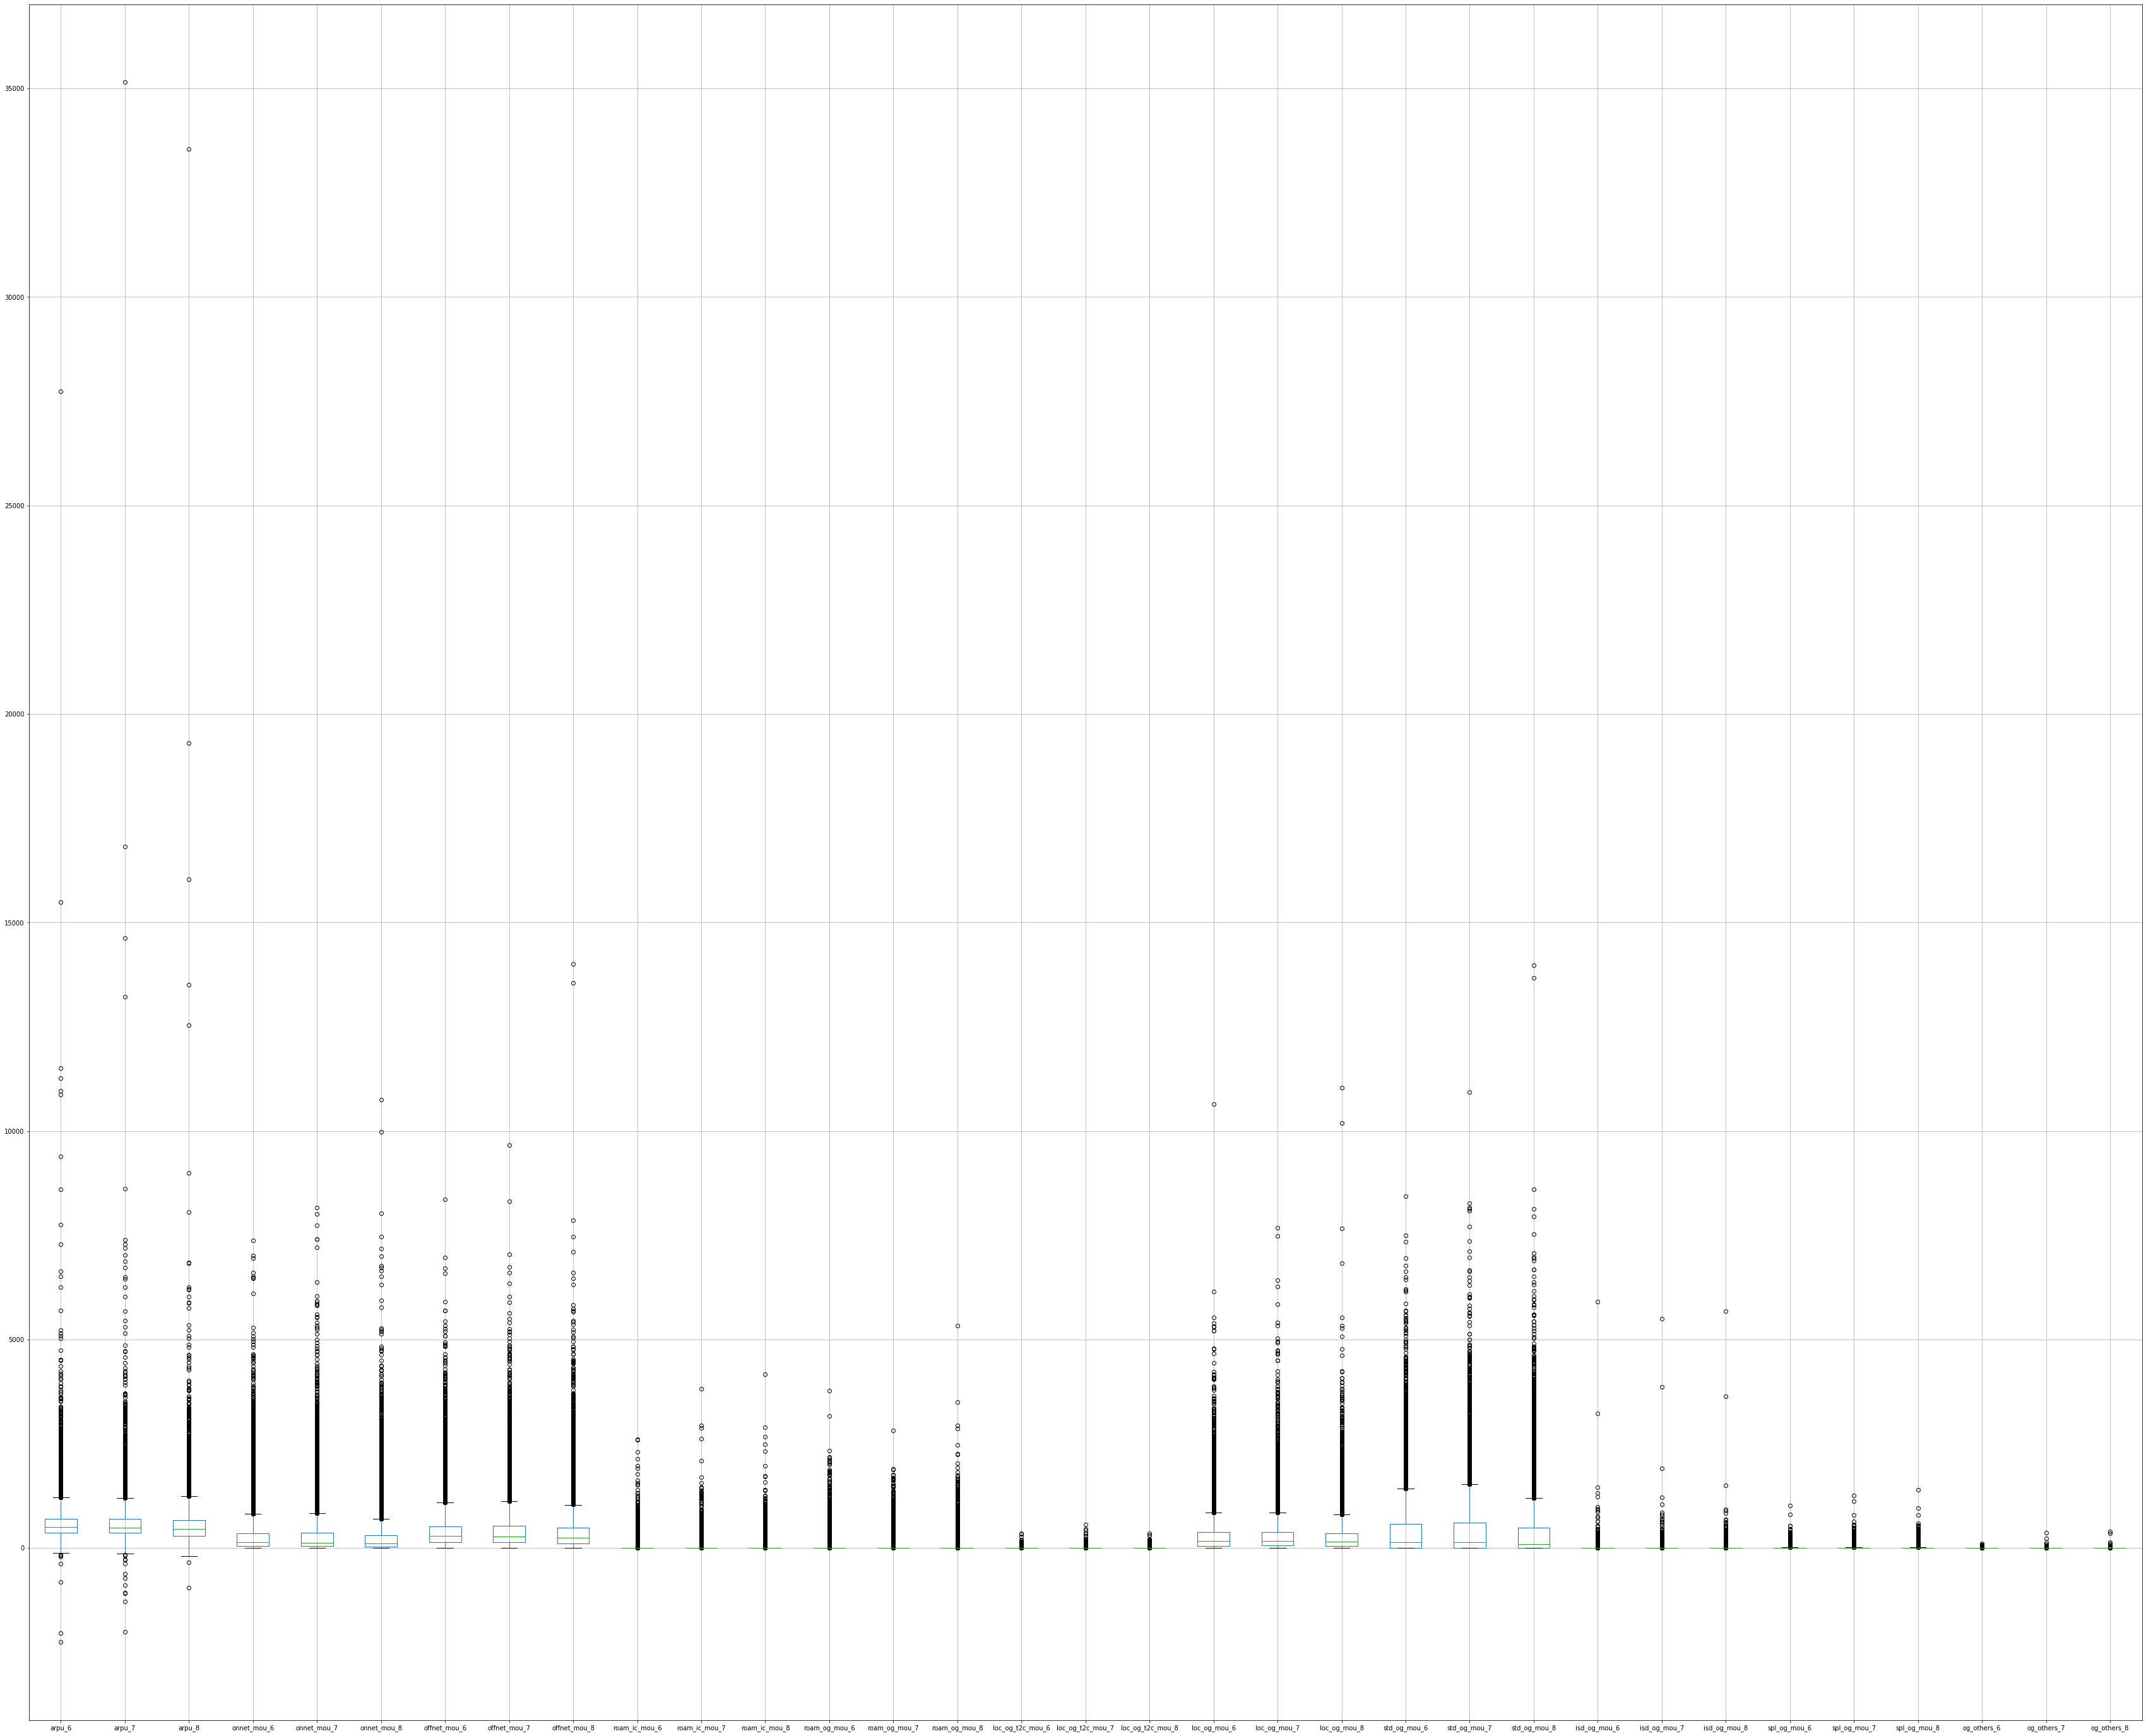

In [35]:
plt.figure(figsize=(60,50))
boxplot1 = df1.boxplot(column=col1)
plt.show()

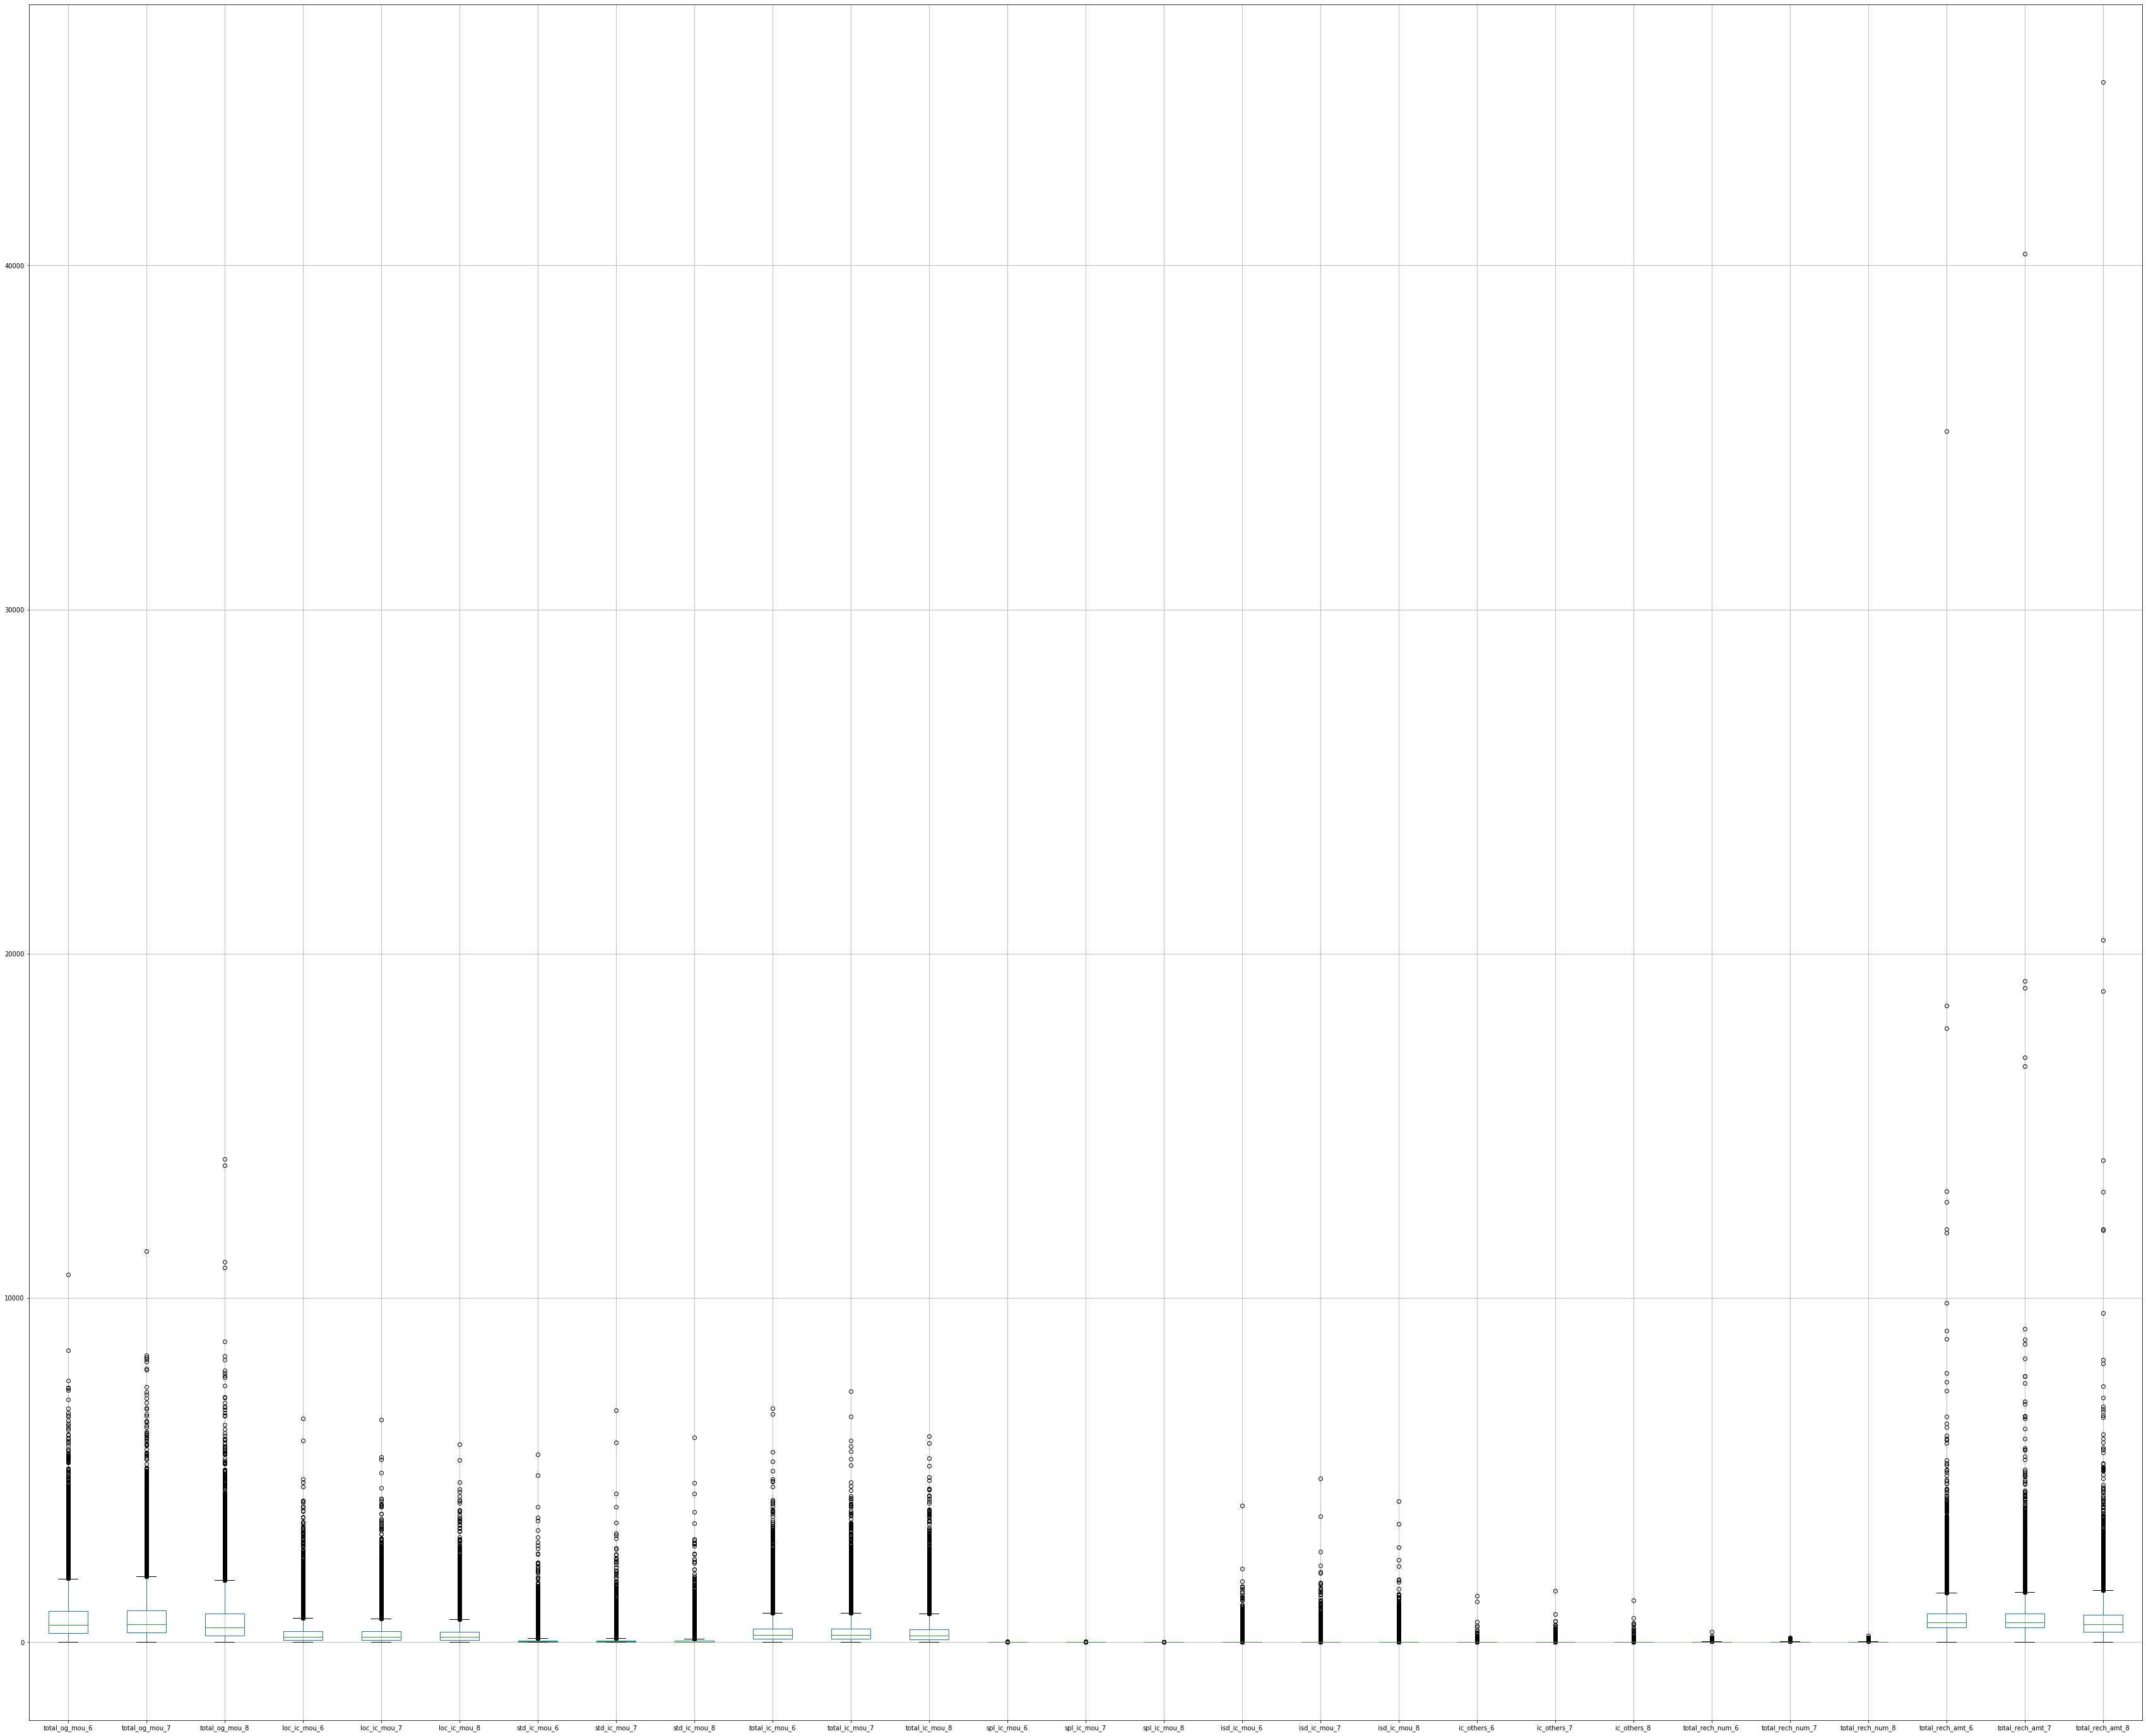

In [36]:
plt.figure(figsize=(60,50))
boxplot2 = df1.boxplot(column=col2)
plt.show()

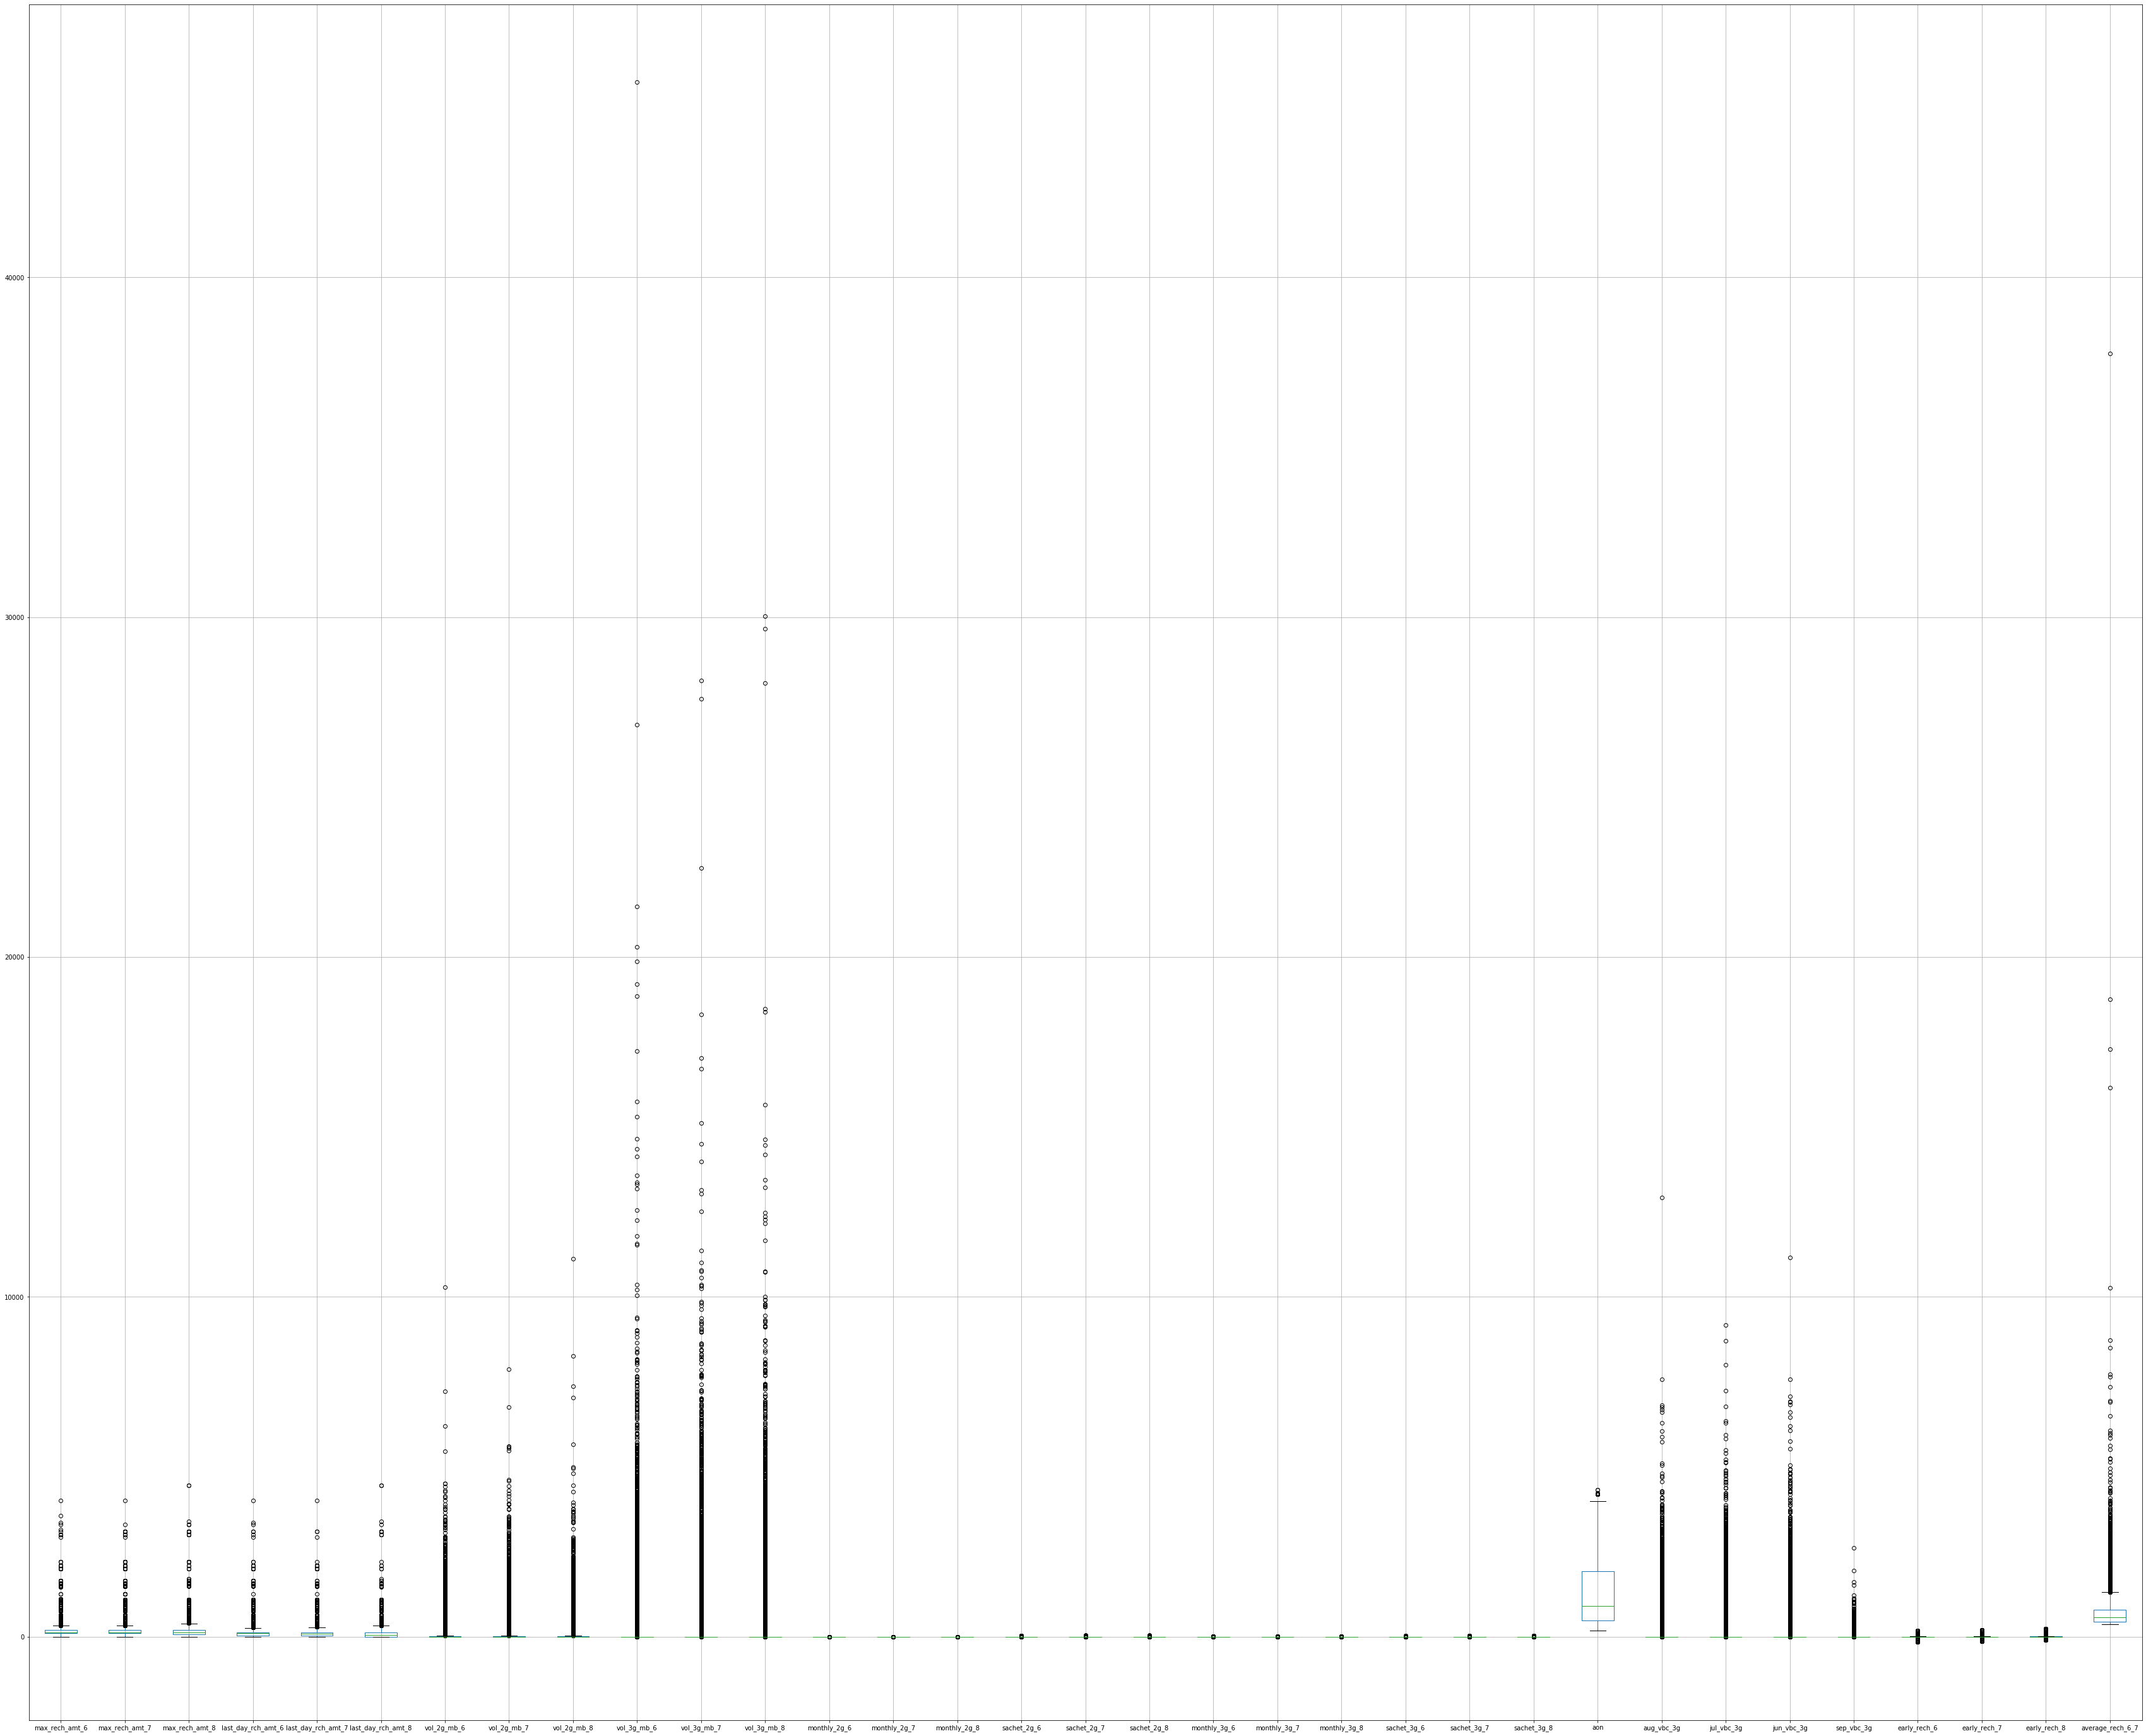

In [37]:
plt.figure(figsize=(60,50))
boxplot3 = df1.boxplot(column=col3)
plt.show()

In [38]:
objcol = [i for i in df1.columns if df1[i].dtype == 'O']
print(len(objcol))
numcol = [i for i in df1.columns if df1[i].dtype != 'O']
print(len(numcol))

0
95


In [39]:
contCol = []

for i in numcol:
    print("{} -- {}".format(i, df1[i].nunique()))
    if df1[i].nunique() >= 10:
        contCol.append(i)

mobile_number -- 30011
arpu_6 -- 29261
arpu_7 -- 29260
arpu_8 -- 28405
onnet_mou_6 -- 18814
onnet_mou_7 -- 18939
onnet_mou_8 -- 17605
offnet_mou_6 -- 22455
offnet_mou_7 -- 22651
offnet_mou_8 -- 21514
roam_ic_mou_6 -- 4339
roam_ic_mou_7 -- 3650
roam_ic_mou_8 -- 3656
roam_og_mou_6 -- 5175
roam_og_mou_7 -- 4432
roam_og_mou_8 -- 4383
loc_og_t2c_mou_6 -- 1659
loc_og_t2c_mou_7 -- 1751
loc_og_t2c_mou_8 -- 1731
loc_og_mou_6 -- 19692
loc_og_mou_7 -- 19881
loc_og_mou_8 -- 18886
std_og_mou_6 -- 18326
std_og_mou_7 -- 18446
std_og_mou_8 -- 16865
isd_og_mou_6 -- 1114
isd_og_mou_7 -- 1126
isd_og_mou_8 -- 941
spl_og_mou_6 -- 3054
spl_og_mou_7 -- 3400
spl_og_mou_8 -- 3239
og_others_6 -- 863
og_others_7 -- 124
og_others_8 -- 134
total_og_mou_6 -- 24607
total_og_mou_7 -- 24913
total_og_mou_8 -- 23644
loc_ic_mou_6 -- 19134
loc_ic_mou_7 -- 19031
loc_ic_mou_8 -- 18574
std_ic_mou_6 -- 8392
std_ic_mou_7 -- 8544
std_ic_mou_8 -- 8034
total_ic_mou_6 -- 20602
total_ic_mou_7 -- 20711
total_ic_mou_8 -- 20096
spl_ic

In [40]:
len(contCol)

91

In [41]:
df['monthly_3g_6'].value_counts()

0     94290
1      4472
2       861
3       237
4        76
5        34
6        12
7         9
8         3
11        2
9         2
14        1
Name: monthly_3g_6, dtype: int64

# Scaling of the dataset because of high variance

In [42]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df1[contCol] = mms.fit_transform(df1[contCol])

df1.describe()

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean        0.507232      0.094899      0.070054      0.042931      0.040320   
std         0.283985      0.014762      0.012457      0.014273      0.062369   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.265891      0.087459      0.064022      0.035820      0.005898   
50%         0.510982      0.091844      0.067482      0.040531      0.017760   
75%         0.752397      0.098788      0.073058      0.046883      0.047895   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean       0.037473      0.025274      0.050227      0.044058      0.027212   
std        0.058976      0.043222      0.056105      0.050190      0.033830   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.005303      0.003161      0.017080      0.014610      0.007977   
50%        0.015990      0.010517      0.033745      0.029165      0.017201   
75%        0.044120      0.027690      0.062557      0.055104      0.034454   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30011.000000   30011.000000   30011.000000   30011.000000   
mean        0.006703       0.003565       0.003234       0.007806   
std         0.030282       0.020007       0.017872       0.031401   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count   30011.000000   30011.000000      30011.000000      30011.000000   
mean        0.007872       0.004081          0.004605          0.003293   
std         0.034817       0.019898          0.020089          0.016243   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.000000          0.000000   
50%         0.000000       0.000000          0.000000          0.000000   
75%         0.000000       0.000000          0.000087          0.000369   
max         1.000000       1.000000          1.000000          1.000000   

       loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  \
count      30011.000000  30011.000000  30011.000000  30011.000000   
mean           0.004995      0.026727      0.037205      0.024063   
std            0.021008      0.035622      0.048864      0.032990   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.005084      0.007856      0.004348   
50%            0.000000      0.015626      0.022208      0.013431   
75%            0.001080      0.035184      0.048963      0.031550   
max            1.000000      1.000000      1.000000      1.000000   

       std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  \
count  30011.000000  30011.000000  30011.000000  30011.000000  30011.000000   
mean       0.047034      0.038137      0.025680      0.000385      0.000403   
std        0.071813      0.058201      0.043908      0.007782      0.008309   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000825      0.000606      0.000267      0.000000      0.000000   
50%        0.016231      0.013270      0.007045      0.000000      0.000000   
75%        0.067958      0.056246      0.034408      0.000000      0.000000   
max        1.000000   

In [43]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 95 columns):
mobile_number         30011 non-null float64
arpu_6                30011 non-null float64
arpu_7                30011 non-null float64
arpu_8                30011 non-null float64
onnet_mou_6           30011 non-null float64
onnet_mou_7           30011 non-null float64
onnet_mou_8           30011 non-null float64
offnet_mou_6          30011 non-null float64
offnet_mou_7          30011 non-null float64
offnet_mou_8          30011 non-null float64
roam_ic_mou_6         30011 non-null float64
roam_ic_mou_7         30011 non-null float64
roam_ic_mou_8         30011 non-null float64
roam_og_mou_6         30011 non-null float64
roam_og_mou_7         30011 non-null float64
roam_og_mou_8         30011 non-null float64
loc_og_t2c_mou_6      30011 non-null float64
loc_og_t2c_mou_7      30011 non-null float64
loc_og_t2c_mou_8      30011 non-null float64
loc_og_mou_6          30011 non-null

# Train test Split and Class imbalance is handled using oversampling technique (SMOTE Oversampling on train data)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(df1.drop(['churn','mobile_number'],axis=1), df1['churn'], test_size=0.3, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(21007, 93)
(21007,)
0    19187
1     1820
Name: churn, dtype: int64


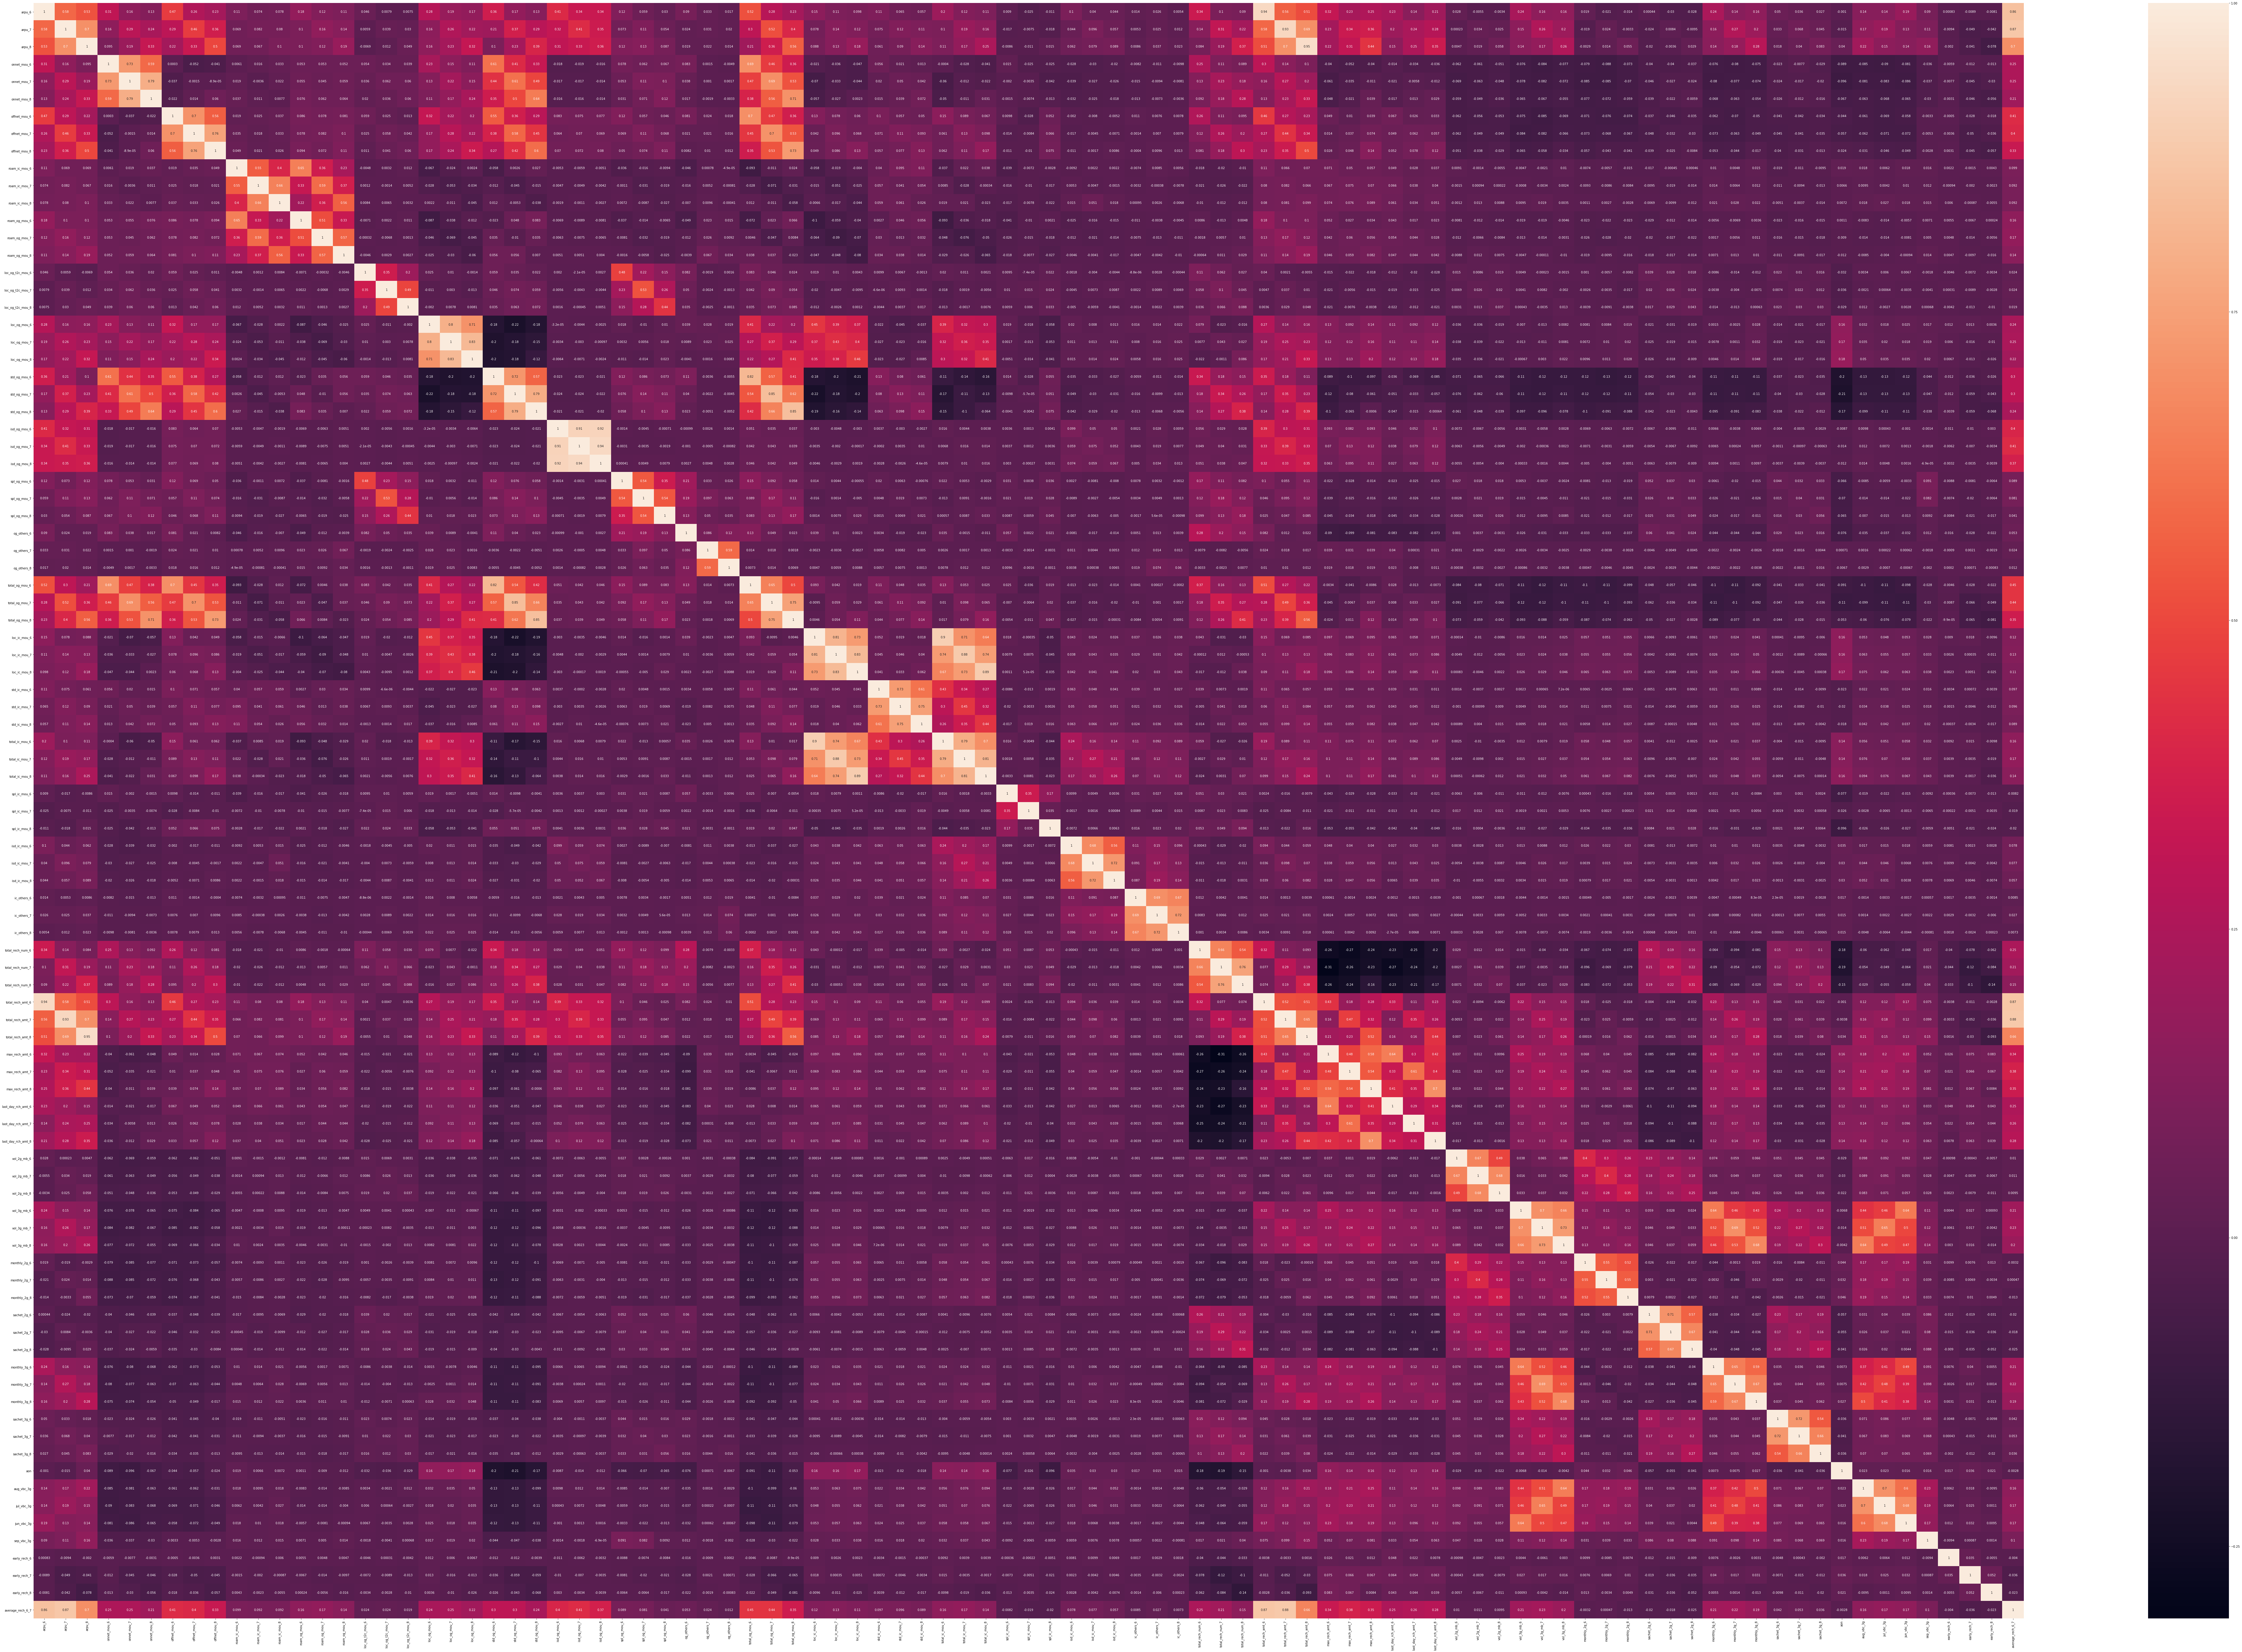

In [45]:
plt.figure(figsize = (150, 100)) 
sns.heatmap(x_train.corr(), annot=True)
plt.show()

In [46]:
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

print(x_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(38374, 93)
(38374,)
1    19187
0    19187
Name: churn, dtype: int64


## PCA - Dimensionality Reduction and Visualization

In [48]:
pca = PCA(random_state=100, n_components=60)
pca.fit(x_train)

components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':x_train.columns })
components

PC1       PC2             Feature
0  -0.000718 -0.002419              arpu_6
1   0.000590  0.003090              arpu_7
2   0.002511  0.002728              arpu_8
3  -0.017147  0.002260         onnet_mou_6
4  -0.013631  0.005301         onnet_mou_7
5  -0.004641  0.003417         onnet_mou_8
6  -0.012703  0.001209        offnet_mou_6
7  -0.008151  0.005306        offnet_mou_7
8  -0.000224  0.004262        offnet_mou_8
9  -0.001196 -0.001121       roam_ic_mou_6
10 -0.001095 -0.000607       roam_ic_mou_7
11 -0.000671 -0.000042       roam_ic_mou_8
12 -0.002476 -0.000294       roam_og_mou_6
13 -0.003573 -0.000462       roam_og_mou_7
14 -0.001540  0.001056       roam_og_mou_8
15 -0.000136 -0.000284    loc_og_t2c_mou_6
16 -0.000082 -0.000308    loc_og_t2c_mou_7
17  0.000211 -0.000238    loc_og_t2c_mou_8
18  0.004318 -0.001395        loc_og_mou_6
19  0.006740  0.000658        loc_og_mou_7
20  0.005222  0.000279        loc_og_mou_8
21 -0.031864  0.004764        std_og_mou_6
22 -0.021177  0.007993        std_og_mou_7
23 -0.007347  0.006175        std_og_mou_8
24 -0.000131  0.000209        isd_og_mou_6
25  0.000017  0.000562        isd_og_mou_7
26 -0.000036  0.000081        isd_og_mou_8
27 -0.000136  0.001384        spl_og_mou_6
28 -0.000673  0.001452        spl_og_mou_7
29 -0.000051  0.001229        spl_og_mou_8
30 -0.001926  0.001179         og_others_6
31 -0.000167  0.000041         og_others_7
32 -0.000145 -0.000064         og_others_8
33 -0.020556  0.002174      total_og_mou_6
34 -0.015263  0.008745      total_og_mou_7
35 -0.001832  0.007907      total_og_mou_8
36  0.009566 -0.001946        loc_ic_mou_6
37  0.010730  0.001033        loc_ic_mou_7
38  0.013637 -0.000523        loc_ic_mou_8
39  0.000732 -0.000856        std_ic_mou_6
40  0.000961  0.000490        std_ic_mou_7
41  0.001797  0.001427        std_ic_mou_8
42  0.010722 -0.003284      total_ic_mou_6
43  0.011648  0.002203      total_ic_mou_7
44  0.017634  0.003909      total_ic_mou_8
45 -0.000227 -0.000068        spl_ic_mou_6
46  0.000103 -0.000024        spl_ic_mou_7
47 -0.000847 -0.000088        spl_ic_mou_8
48  0.000944 -0.000421        isd_ic_mou_6
49  0.000808  0.000947        isd_ic_mou_7
50  0.000870  0.001283        isd_ic_mou_8
51  0.000071 -0.000099         ic_others_6
52  0.000232  0.000172         ic_others_7
53  0.000098 -0.000062         ic_others_8
54 -0.007036  0.002161    total_rech_num_6
55 -0.012934  0.018857    total_rech_num_7
56 -0.002163  0.009399    total_rech_num_8
57 -0.000750 -0.002885    total_rech_amt_6
58  0.000659  0.003909    total_rech_amt_7
59  0.002321  0.002343    total_rech_amt_8
60  0.007527 -0.010176      max_rech_amt_6
61  0.008222  0.003094      max_rech_amt_7
62  0.009969  0.003059      max_rech_amt_8
63  0.001771 -0.004282  last_day_rch_amt_6
64  0.004568  0.001714  last_day_rch_amt_7
65  0.005395  0.001650  last_day_rch_amt_8
66  0.021270 -0.017193         vol_2g_mb_6
67  0.029640  0.014498         vol_2g_mb_7
68  0.014732  0.007833         vol_2g_mb_8
69  0.005633 -0.003303         vol_3g_mb_6
70  0.011066  0.003093         vol_3g_mb_7
71  0.009596  0.001375         vol_3g_mb_8
72  0.591502 -0.785921        monthly_2g_6
73  0.644194  0.578425        monthly_2g_7
74  0.474525  0.203601        monthly_2g_8
75  0.001720  0.004888         sachet_2g_6
76  0.000878  0.001254         sachet_2g_7
77  0.000724  0.000706         sachet_2g_8
78 -0.000065  0.006409        monthly_3g_6
79  0.000417 -0.003743        monthly_3g_7
80  0.002525 -0.001781        monthly_3g_8
81 -0.000042  0.001992         sachet_3g_6
82 -0.000442  0.000276         sachet_3g_7
83 -0.000011  0.000406         sachet_3g_8
84  0.054190 -0.066513                 aon
85  0.012800  0.002634          aug_vbc_3g
86  0.019357  0.002013          jul_vbc_3g
87  0.013318 -0.006728          jun_vbc_3g
88  0.001595  0.000413          sep_vbc_3g
89  0.000898 -0.001460        early_rech_6
90  0.000292 -0.001470        early_rech_7
91 -0.002398 -0.008595        early_rech_8
92  0.0000

In [49]:
print('Variation per principal component: {}'.format(pca.explained_variance_ratio_))

Variation per principal component: [4.41608871e-01 1.20814420e-01 1.09955745e-01 9.70924283e-02
 4.67525570e-02 2.52053745e-02 1.71596115e-02 1.56192848e-02
 1.40486701e-02 1.06480125e-02 9.69916493e-03 8.08910567e-03
 6.33355526e-03 5.71012622e-03 5.35139214e-03 4.58982408e-03
 4.21982876e-03 4.05353254e-03 3.59173488e-03 3.27948950e-03
 3.22288720e-03 2.69293696e-03 2.37749274e-03 2.34599078e-03
 2.25001891e-03 2.01589739e-03 1.92376750e-03 1.70142762e-03
 1.59173229e-03 1.54660439e-03 1.52305032e-03 1.40215522e-03
 1.28634422e-03 1.15901634e-03 1.02420563e-03 1.00386493e-03
 9.82126595e-04 9.32539660e-04 9.08253677e-04 8.14872933e-04
 8.04606087e-04 7.27185071e-04 6.93677889e-04 6.43641102e-04
 6.36927323e-04 6.13241659e-04 6.10064107e-04 5.67489534e-04
 5.61201918e-04 5.31396451e-04 5.02780956e-04 4.48384997e-04
 4.43574335e-04 4.39756953e-04 4.26145423e-04 4.12724753e-04
 4.01208994e-04 3.80742529e-04 3.35454720e-04 3.31494654e-04]


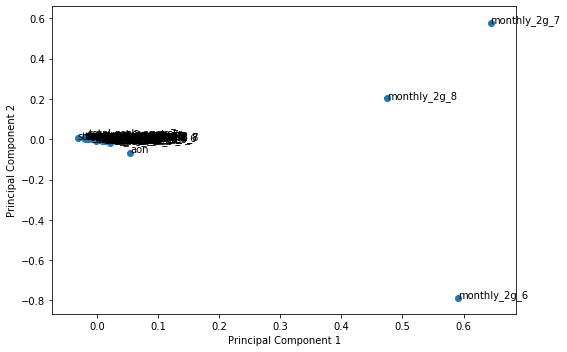

In [50]:
fig = plt.figure(figsize=(8,5))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

## PCA - Number of components
1. Baseline model performance was checked for number of components in PCA ranging from 2 to 70. 
2. 60 was chosen as an optimal value because of steady variation

In [51]:
pca_train = pca.transform(x_train)
print(pca_train.shape)

(38374, 60)


In [52]:
pca_test = pca.transform(x_test)
print(pca_test.shape)

(9004, 60)


In [53]:
_list = []
for i in range(1,61):
    _list.append('PCA'+str(i))
pca_trainDf = pd.DataFrame(data=pca_train, columns=_list)

pca_trainDf.head()

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  1.579676 -0.008069  0.062436  0.202388 -0.042647 -0.058674 -0.023338   
1 -0.157496  0.019044 -0.182532  0.061272 -0.062057  0.048946  0.005655   
2 -0.113852 -0.028614  0.445830 -0.147478 -0.107539 -0.097591 -0.004758   
3 -0.146875  0.004847  0.020007 -0.004474 -0.007286 -0.013244  0.052364   
4  1.767424  0.351070 -0.087823 -1.164375  0.061286  0.093191 -0.049209   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0  0.010649 -0.018433 -0.003064 -0.031118 -0.011540  0.018732 -0.003010   
1  0.015085 -0.005246 -0.011675 -0.041889 -0.021041 -0.016225  0.021314   
2 -0.010629  0.086048 -0.022897  0.078200 -0.060257 -0.042727 -0.016965   
3 -0.073737  0.050883 -0.020468  0.042206 -0.041633 -0.042325 -0.017130   
4 -0.034699 -0.009195 -0.014874 -0.009842 -0.015347 -0.038566  0.001303   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0 -0.024275  0.004723 -0.000242 -0.008890  0.007953 -0.008052  0.024318   
1  0.037651  0.024324  0.001301 -0.007947 -0.019853  0.002702 -0.000297   
2  0.024270 -0.002471 -0.004075 -0.011486  0.028097 -0.018824 -0.020923   
3  0.049924  0.005963 -0.001809 -0.002436 -0.009844 -0.026630  0.011871   
4  0.020729  0.002532  0.008274 -0.014697  0.035027  0.013313 -0.023864   

      PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28  \
0 -0.015061  0.042897  0.009419  0.000275  0.023900  0.010057  0.012419   
1 -0.015602 -0.006810  0.008250  0.008062 -0.000821  0.002102  0.005121   
2 -0.023001  0.092298  0.020078  0.005594  0.008383 -0.076622 -0.002914   
3 -0.021253  0.061171  0.024944 -0.003221  0.002463 -0.054129  0.008742   
4 -0.039677 -0.001352 -0.008308  0.020891 -0.009960 -0.036321  0.013097   

      PCA29     PCA30     PCA31     PCA32     PCA33     PCA34     PCA35  \
0 -0.012354 -0.003919  0.004638 -0.012350 -0.001584  0.008991 -0.003058   
1  0.003117 -0.012941 -0.015926  0.001320  0.003716  0.003594  0.011216   
2  0.004068  0.000084  0.000135  0.019049 -0.022495  0.003148 -0.019684   
3 -0.010142 -0.001590  0.023449 -0.014914 -0.016096  0.010253 -0.016108   
4 -0.012679 -0.004395 -0.015225 -0.043044 -0.004747  0.004955 -0.020321   

      PCA36     PCA37     PCA38     PCA39     PCA40     PCA41     PCA42  \
0 -0.004489 -0.003489  0.000324  0.010617 -0.003168  0.005799 -0.006462   
1 -0.017889  0.002537 -0.010501 -0.007720  0.013915  0.013494 -0.008547   
2  0.015174 -0.032857  0.021160  0.004775 -0.002213  0.001410 -0.007771   
3 -0.036610  0.002057  0.010259 -0.001291 -0.014544  0.007072 -0.001874   
4 -0.002956 -0.023914  0.025814  0.003552  0.002303 -0.005023  0.001160   

      PCA43     PCA44     PCA45     PCA46     PCA47     PCA48     PCA49  \
0 -0.011235 -0.000218 -0.000831 -0.003653  0.030038 -0.009005 -0.004526   
1 -0.006064 -0.011636  0.002217 -0.001926  0.005184  0.024072  0.017922   
2 -0.004540 -0.026808 -0.001708  0.000135 -0.004558 -0.015374  0.008468   
3  0.010834 -0.018666  0.011827  0.010192 -0.032809  0.005551 -0.003466   
4  0.012877 -0.004980  0.003129  0.011404 -0.060139  0.005927  0.015665   

      PCA50     PCA51     PCA52     PCA53     PCA54     PCA55     PCA56  \
0  0.004597  0.009483  0.012537 -0.010652 -0.025251 -0.013285 -0.002709   
1  0.018960  0.006723 -0.001524 -0.001694  0.002251 -0.001501 -0.003003   
2 -0.010794 -0.005286 -0.028296 -0.000721  0.000142 -0.013096 -0.003245   
3 -0.001386 -0.007696 -0.033599 -0.000845 -0.005742 -0.006577 -0.006979   
4 -0.014227 -0.021095 -0.084630  0.003839  0.019122 -0.011231 -0.001455   

      PCA57     PCA58     PCA59     PCA60  
0 -0.000566  0.001960  0.017109 -0.025167  
1 -0.005485  0.003001 -0.001064 -0.000870  
2 -0.002088  0.004205  0.001338 -0.005937  
3 -0.002201 -0.000033  0.003045 -0.006689  
4 -0.008872 -0.003851 -0.026627  0.036648

# PCA Components Visualization

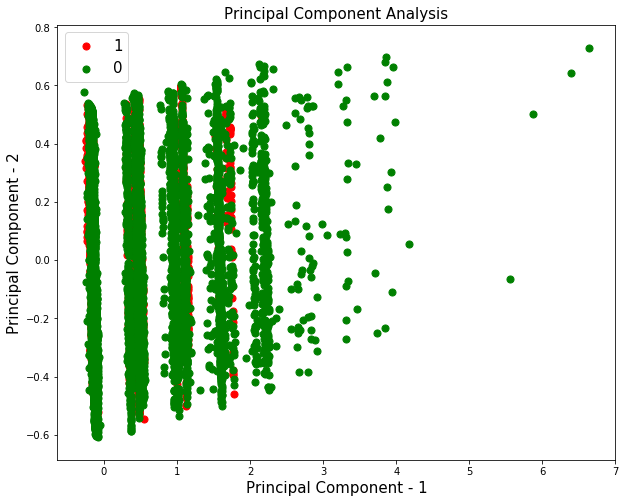

In [190]:
# The plot is for PCA with 2 compenents by which it seems that it is not all separable, 
# So PCA is performed with diff number of components to increase accuracy on the model.

plt.figure(figsize=(10,8))
plt.xlabel('Principal Component - 1', fontsize=15)
plt.ylabel('Principal Component - 2', fontsize=15)
plt.title("Principal Component Analysis", fontsize=15)
targets = [1,0]
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = y_train==target
    plt.scatter(pca_trainDf.loc[indicesToKeep, 'PCA1'], pca_trainDf.loc[indicesToKeep, 'PCA2'], c=color, s=50)

plt.legend(targets, prop={'size':15})

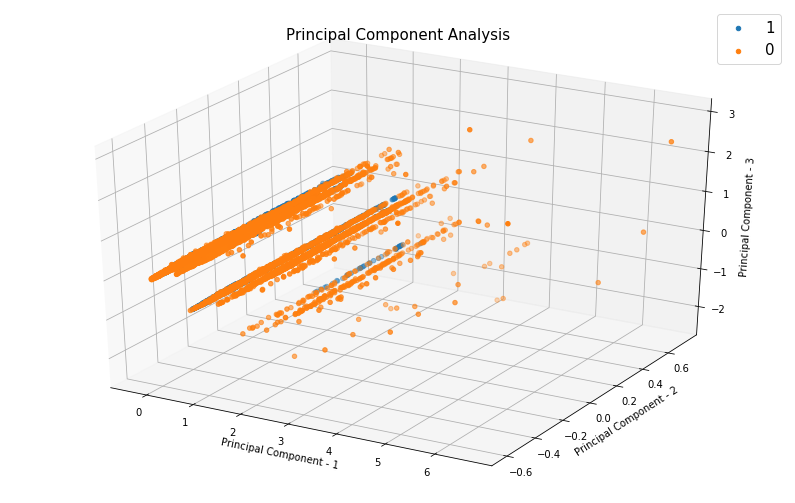

In [266]:
# The plot is for PCA with 3 compenents by which it seems that it is not all separable, 
# So PCA is performed with diff number of components to increase accuracy on the model.

from mpl_toolkits import mplot3d 

fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d')
ax.set_xlabel('Principal Component - 1', fontsize=10)
ax.set_ylabel('Principal Component - 2', fontsize=10)
ax.set_zlabel('Principal Component - 3', fontsize=10)
ax.set_title("Principal Component Analysis", fontsize=15)

targets = [1,0]
colors = ['r', 'g']

for target, color in zip(targets, colors):
    indicesToKeep = y_train==target
    ax.scatter3D(pca_trainDf.loc[indicesToKeep,'PCA1'], pca_trainDf.loc[indicesToKeep,'PCA2'], 
                pca_trainDf.loc[indicesToKeep,'PCA3'], cmap='Greens')

plt.legend(targets, prop={'size':15})

# Logistic Regression

In [54]:
lgc = LogisticRegression()
lgc.fit(pca_train, y_train)

y_pred_train = lgc.predict(pca_train)
print(metrics.precision_recall_fscore_support(y_train, y_pred_train, average='weighted'))

y_pred_test = lgc.predict(pca_test)
print(metrics.precision_recall_fscore_support(y_test, y_pred_test, average='weighted'))

(0.8344080048621298, 0.8340543076041069, 0.834010416564069, None)
(0.9199153115501078, 0.8194135939582408, 0.8532125363608726, None)


In [55]:
rfe = RFE(lgc, 15)
rfe.fit(x_train, y_train)

col = x_train.columns[rfe.support_]
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 2),
 ('arpu_7', False, 32),
 ('arpu_8', False, 8),
 ('onnet_mou_6', False, 17),
 ('onnet_mou_7', False, 23),
 ('onnet_mou_8', False, 29),
 ('offnet_mou_6', False, 18),
 ('offnet_mou_7', False, 25),
 ('offnet_mou_8', False, 44),
 ('roam_ic_mou_6', False, 46),
 ('roam_ic_mou_7', False, 9),
 ('roam_ic_mou_8', False, 21),
 ('roam_og_mou_6', False, 65),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 5),
 ('loc_og_t2c_mou_6', False, 49),
 ('loc_og_t2c_mou_7', False, 38),
 ('loc_og_t2c_mou_8', False, 78),
 ('loc_og_mou_6', False, 77),
 ('loc_og_mou_7', False, 37),
 ('loc_og_mou_8', True, 1),
 ('std_og_mou_6', False, 15),
 ('std_og_mou_7', True, 1),
 ('std_og_mou_8', False, 12),
 ('isd_og_mou_6', False, 28),
 ('isd_og_mou_7', False, 47),
 ('isd_og_mou_8', False, 55),
 ('spl_og_mou_6', False, 30),
 ('spl_og_mou_7', False, 45),
 ('spl_og_mou_8', False, 59),
 ('og_others_6', False, 42),
 ('og_others_7', False, 43),
 ('og_others_8', False, 52),
 ('total_og_mou_6', False,

In [56]:
col

Index(['roam_og_mou_7', 'loc_og_mou_8', 'std_og_mou_7', 'total_og_mou_8',
       'loc_ic_mou_7', 'std_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8', 'monthly_3g_8'],
      dtype='object')

['roam_og_mou_7', 'loc_og_mou_8', 'std_og_mou_7', 'total_og_mou_8',
 'loc_ic_mou_7', 'std_ic_mou_6', 'total_ic_mou_8', 'spl_ic_mou_8',
 'total_rech_num_8', 'total_rech_amt_6', 'last_day_rch_amt_8',
 'vol_2g_mb_8', 'vol_3g_mb_8', 'sachet_2g_8', 'monthly_3g_8']

# Tree Models

In [57]:
rfc = RandomForestClassifier()
rfc.fit(pca_train, y_train)

y_pred_train = rfc.predict(pca_train)
print(metrics.precision_recall_fscore_support(y_train, y_pred_train, average='weighted'))

y_pred_test = rfc.predict(pca_test)
print(metrics.precision_recall_fscore_support(y_test, y_pred_test, average='weighted'))

(1.0, 1.0, 1.0, None)
(0.9131300339624798, 0.9121501554864505, 0.912632673752121, None)


In [282]:
rfe2 = RFE(rfc, 10)
rfe2.fit(x_train, y_train)

col2 = x_train.columns[rfe2.support_]
list(zip(x_train.columns, rfe2.support_, rfe2.ranking_))

[('mobile_number', False, 12),
 ('arpu_6', False, 39),
 ('arpu_7', False, 3),
 ('arpu_8', True, 1),
 ('onnet_mou_6', False, 18),
 ('onnet_mou_7', False, 14),
 ('onnet_mou_8', False, 38),
 ('offnet_mou_6', False, 33),
 ('offnet_mou_7', False, 34),
 ('offnet_mou_8', False, 32),
 ('roam_ic_mou_6', False, 49),
 ('roam_ic_mou_7', False, 15),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 54),
 ('roam_og_mou_7', False, 26),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 66),
 ('loc_og_t2c_mou_7', False, 55),
 ('loc_og_t2c_mou_8', False, 42),
 ('loc_og_mou_6', False, 37),
 ('loc_og_mou_7', False, 17),
 ('loc_og_mou_8', False, 2),
 ('std_og_mou_6', False, 7),
 ('std_og_mou_7', False, 10),
 ('std_og_mou_8', False, 41),
 ('isd_og_mou_6', False, 60),
 ('isd_og_mou_7', False, 65),
 ('isd_og_mou_8', False, 22),
 ('spl_og_mou_6', False, 28),
 ('spl_og_mou_7', False, 11),
 ('spl_og_mou_8', False, 47),
 ('og_others_6', False, 50),
 ('og_others_7', False, 85),
 ('og_others_8', False,

In [283]:
col2

Index(['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'total_og_mou_8',
       'total_ic_mou_8', 'total_rech_num_7', 'total_rech_amt_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'early_rech_8'],
      dtype='object')

['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'total_og_mou_8',
 'total_ic_mou_8', 'total_rech_num_7', 'total_rech_amt_8',
 'max_rech_amt_8', 'last_day_rch_amt_8', 'early_rech_8']

## The Following top 10 variables were chosen as Important indicators for controlling Churn using RFE:
1. Average Revenue per user of 8th Month (arpu_8)
2. Roaming Incoming Calls for 8th Month (roam_ic_mou_8)
3. Roaming Outgoing Calls for 8th Month (roam_og_mou_8)
4. Total Outgoing Calls for 8th Month (total_og_mou_8)
5. Total Incoming Calls for 8th Month (total_ic_mou_8)
6. Total Number of recharges from 7th Month (total_rech_num_7)
7. Total recharge amount from 8th Month (total_rech_amt_8)
8. Max recharge amount from 8th Month (max_rech_amt_8)
9. Last Day Recharge Amount for 8th Month (last_day_rch_amt_8)
10. Early recharge days for 8th Month (early_rech_8) 

# HyperParameter using GridSearchCV

## Random Forest Classifier

In [144]:
param_grid = {"n_estimators": [50,100,200], "max_depth": [5,10,15,20], "min_samples_leaf": [2,3,4]}
rfc = RandomForestClassifier()

folds=3
grid_search_RFC = GridSearchCV(rfc, cv=folds, param_grid=param_grid, scoring='recall', verbose=1)
grid_search_RFC.fit(pca_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 32.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

Fitting 3 folds for each of 36 candidates, totalling 108 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 32.4min finished
        
GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [2, 3, 4],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [145]:
grid_search_RFC.best_params_

{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}

{'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}

In [58]:
rfc2 = RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200)
rfc2.fit(pca_train, y_train)

y_pred_train = rfc2.predict(pca_train)
print("Train Scores - {}".format(metrics.precision_recall_fscore_support(y_train, y_pred_train, average='weighted')))

y_pred_test = rfc2.predict(pca_test)
print("Test Scores - {}".format(metrics.precision_recall_fscore_support(y_test, y_pred_test, average='weighted')))

Train Scores - (0.9937454848485106, 0.9936675874289884, 0.993667337655537, None)
Test Scores - (0.9136970162603363, 0.9061528209684585, 0.9095787226147208, None)


## AdaBoost Classifier

In [154]:
param_grid = {"n_estimators": [50,100,200], "learning_rate": [0.5,1,3,5]}
ABC = AdaBoostClassifier()

folds = 3
grid_search_ADB = GridSearchCV(ABC, cv=folds, param_grid=param_grid, scoring='recall', verbose=1)
grid_search_ADB.fit(pca_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 23.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 23.6min finished
        
GridSearchCV(cv=3, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.5, 1, 3, 5],
                         'n_estimators': [50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=1)

In [155]:
grid_search_ADB.best_params_

{'learning_rate': 0.5, 'n_estimators': 200}

{'learning_rate': 0.5, 'n_estimators': 200}

In [161]:
ABC2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), learning_rate=0.5, n_estimators=200)
ABC2.fit(pca_train, y_train)

y_pred_train = ABC2.predict(pca_train)
print(metrics.precision_recall_fscore_support(y_train, y_pred_train, average='weighted'))

y_pred_test = ABC2.predict(pca_test)
print(metrics.precision_recall_fscore_support(y_test, y_pred_test, average='weighted'))

(0.9669803914662853, 0.9667743784854328, 0.9667707136290161, None)
(0.918875215122325, 0.8949355841848068, 0.9044253356376959, None)


## Gradient Boosting Classifier

In [240]:
param_grid = {"learning_rate": [0.5,1,3,5], "subsample": [0.5,1,3,5]}
GBC = GradientBoostingClassifier()

folds = 3
grid_search_GBC = GridSearchCV(GBC, cv=folds, param_grid=param_grid, scoring='recall', verbose=1)
grid_search_GBC.fit(pca_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 13.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [241]:
grid_search_GBC.best_params_

{'learning_rate': 0.5, 'subsample': 1}

{'learning_rate': 0.5, 'subsample': 1}

In [244]:
GBC2 = GradientBoostingClassifier(learning_rate=0.5, subsample=1, max_depth=10)
GBC2.fit(pca_train, y_train)

y_pred_train = GBC2.predict(pca_train)
print(metrics.precision_recall_fscore_support(y_train, y_pred_train, average='weighted'))

y_pred_test = GBC2.predict(pca_test)
print(metrics.precision_recall_fscore_support(y_test, y_pred_test, average='weighted'))

(1.0, 1.0, 1.0, None)
(0.9177005340849584, 0.91003998223012, 0.9134756672969436, None)


# Final Results:
1. Final model chosen is tree based model - Random Forest Classifier with n_estimators=200 and max_depth=20, which has better performance with respect to Logistic Regression and Boosing
2. Top 10 indicators for churn are chosen using Random Forest Classifier to control churn.

    1. Average Revenue per user of 8th Month (arpu_8)
    2. Roaming Incoming Calls for 8th Month (roam_ic_mou_8)
    3. Roaming Outgoing Calls for 8th Month (roam_og_mou_8)
    4. Total Outgoing Calls for 8th Month (total_og_mou_8)
    5. Total Incoming Calls for 8th Month (total_ic_mou_8)
    6. Total Number of recharges from 7th Month (total_rech_num_7)
    7. Total recharge amount from 8th Month (total_rech_amt_8)
    8. Max recharge amount from 8th Month (max_rech_amt_8)
    9. Last Day Recharge Amount for 8th Month (last_day_rch_amt_8)
    10. Early recharge days for 8th Month (early_rech_8) 

## Interpretation 
1. These indicators seem quite understandable for churn detection as most of these indicate user's network usage inclination before the churn month. 
2. If the user is having less calls and recharges in Action Phase, there is more possibility of churn in Churn Phase

# Recommendations
1. Check on users having low average revenue and reacharge amount for 7th and 8th Months, if the revenue and recharge amount is decreasing and less, there is a possibility of churn.

2. Check on users will less incoming and outgoing calls for 8th Month.

3. Check whether users are on roaming for 7th and 8th months which could be a possible reason that they're not churn and less on usage only.